 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [394]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [395]:
# Reading whale returns
whale_returns_csv_path = Path("./Resources/whale_returns.csv")
whale_returns_csv = pd.read_csv(whale_returns_csv_path)
whale_returns_csv.head()


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [396]:
whale_returns_csv.set_index(pd.to_datetime(whale_returns_csv['Date'], infer_datetime_format=True), inplace=True)
whale_returns_csv.drop(columns=['Date'], inplace=True)
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [397]:
# Count nulls
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [398]:
whale_returns_csv.dropna(inplace=True) 
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [400]:
# Reading algorithmic returns
algo_returns_csv_path = Path("./Resources/algo_returns.csv")
algo_returns_csv = pd.read_csv(algo_returns_csv_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [401]:
# Count nulls
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [402]:
# Drop nulls
algo_returns_csv.dropna(inplace=True) 
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [403]:
# Reading S&P 500 Closing Prices
sp500_history_csv_path = Path("./Resources/sp500_history.csv")
sp500_history_csv = pd.read_csv(sp500_history_csv_path, index_col='Date', parse_dates=True, infer_datetime_format=True).sort_index()
sp500_history_csv.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [404]:
# Check Data Types
sp500_history_csv.dtypes

Close    object
dtype: object

In [405]:
sp500_history_csv["Close"] = sp500_history_csv["Close"].str.replace("$","")
sp500_history_csv.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [406]:
# Fix Data Types

sp500_history_csv["Close"] = sp500_history_csv["Close"].astype("float")
sp500_history_csv.dtypes


Close    float64
dtype: object

In [407]:
# Calculate Daily Returns
#sp500_daily_returns = sp500_history_csv.pct_change().dropna()
sp500_daily_returns = sp500_history_csv.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [408]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True) 
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [409]:
# Rename Column
sp500_daily_returns = sp500_daily_returns.rename(columns={
    "Close": "S&P 500"
    })
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [410]:
# Concatenate all DataFrames into a single DataFrame
concat_data = pd.concat([whale_returns_csv, algo_returns_csv, sp500_daily_returns], axis=1, join='inner')
concat_data.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

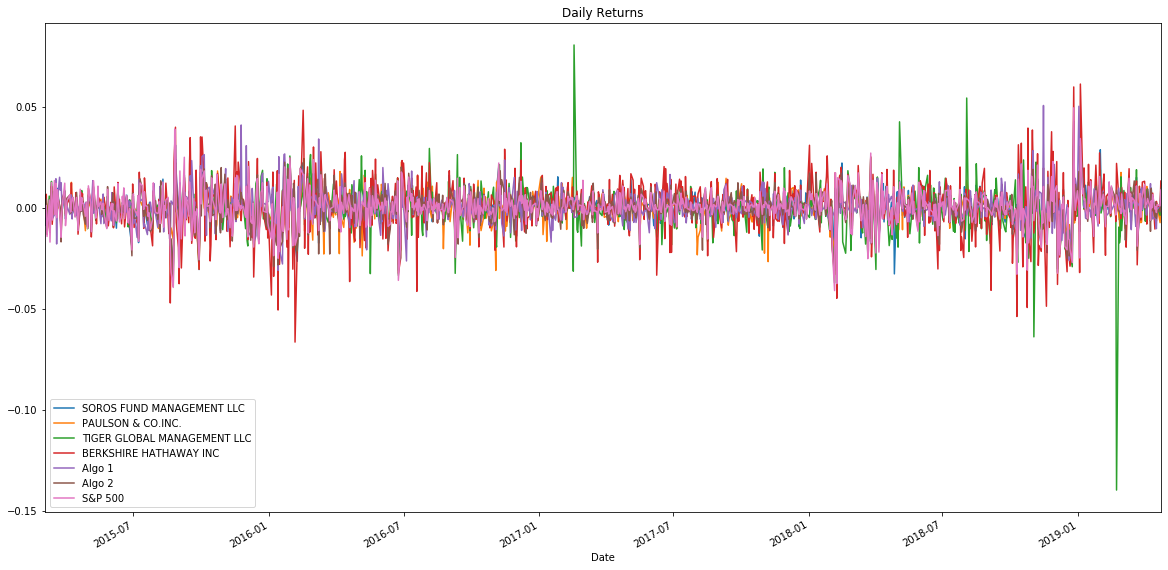

In [411]:
# Plot daily returns
concat_data.plot(figsize=(20,10), title='Daily Returns')

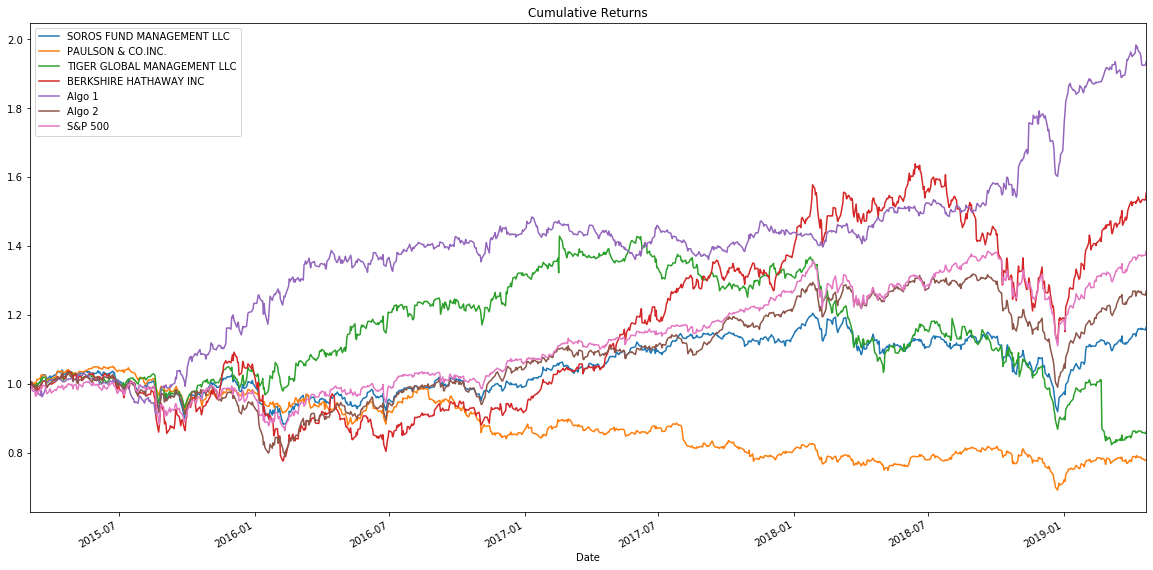

In [413]:
# Plot cumulative returns
cumulative_returns = (1 + concat_data).cumprod()
cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns')


## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

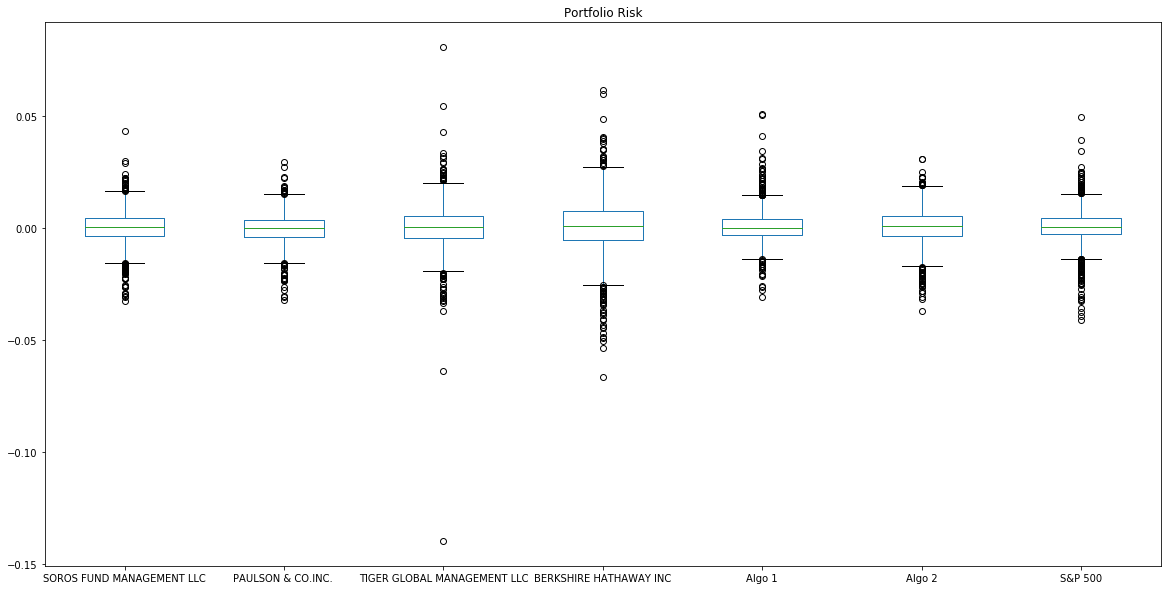

In [414]:
import matplotlib.pyplot as plt

concat_data.boxplot(grid=False, figsize=(20,10))
plt.title('Portfolio Risk')
plt.suptitle("")
plt.show()

In [416]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
volatility = concat_data.std() 
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [417]:
# Determine which portfolios are riskier than the S&P 500
volatility > volatility['S&P 500']


PAULSON & CO.INC.              False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
S&P 500                        False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

In [418]:
# Calculate the annualized standard deviation (252 trading days)
annual_volatility = concat_data.std() * np.sqrt(252)
annual_volatility

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

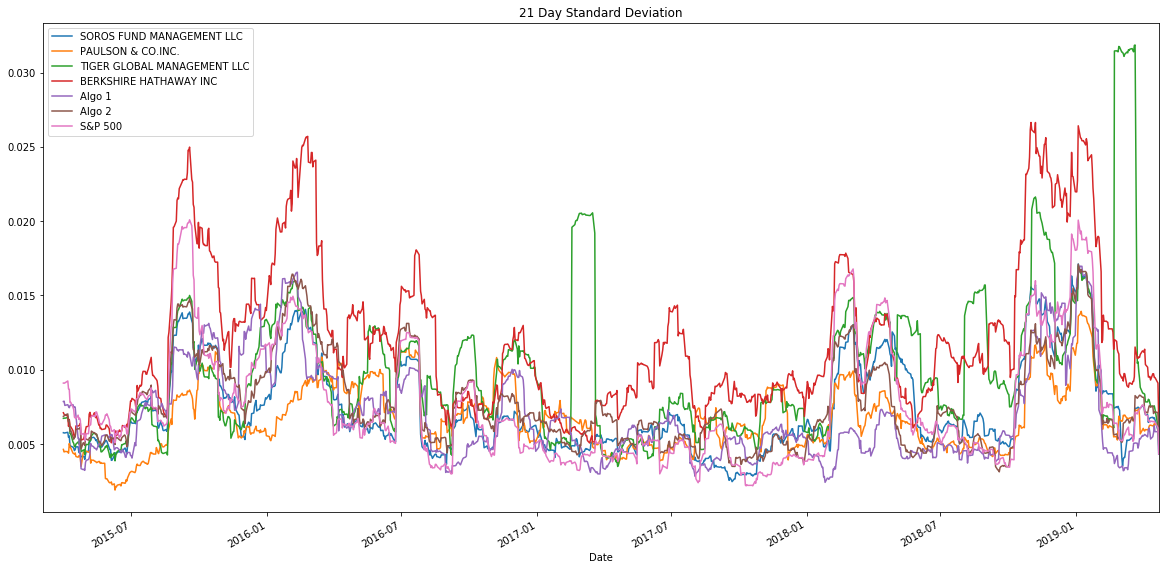

In [419]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

concat_data.rolling(window=21).std().plot(figsize=(20,10), title='21 Day Standard Deviation')

In [420]:
# Derive correlation 
combined_correlation = concat_data.corr()
combined_correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


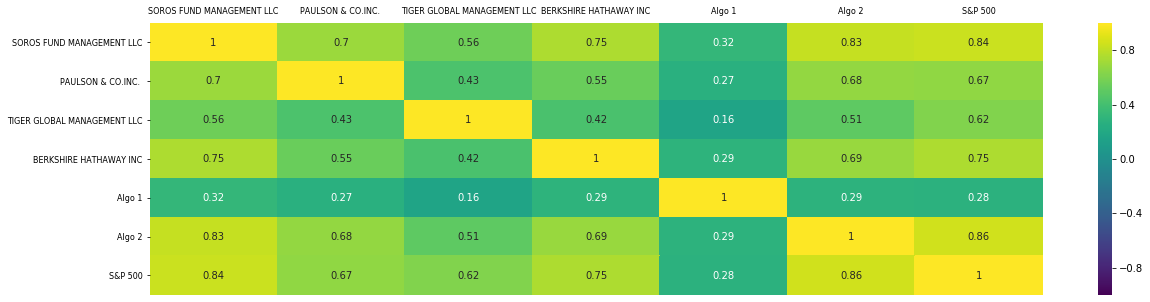

In [421]:
# `heatmap` function from the Seaborn library to visualize the correlation table
plt.subplots(figsize=(20,5))
ax = sns.heatmap(combined_correlation, vmin=-1, vmax=+1, cmap="viridis", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.show()

In [ ]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# beta value of Berkshire to represent the volatility of Berkshire returns relative to the volatility of S&P 500 returns.

# Beta = the covariance of the return of an asset (Berkshire) with the return of the benchmark (S&P 500)     
# divided by the variance of the return of the benchmark over a certain period.

In [422]:
# Calculate 21-day rolling covariance of Berkshire vs. S&P 500
rolling_covariance = concat_data['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(concat_data['S&P 500'])
#rolling_covariance.plot(figsize=(20, 10), title='Rolling Covariance of BERKSHIRE Returns vs. S&P 500 Returns')



In [424]:
# Calculate 21-day rolling variance of S&P 500 
rolling_variance = concat_data['S&P 500'].rolling(window=60).var()
#rolling_variance.plot(figsize=(20, 10), title='Rolling Variance of S&P 500 Returns')

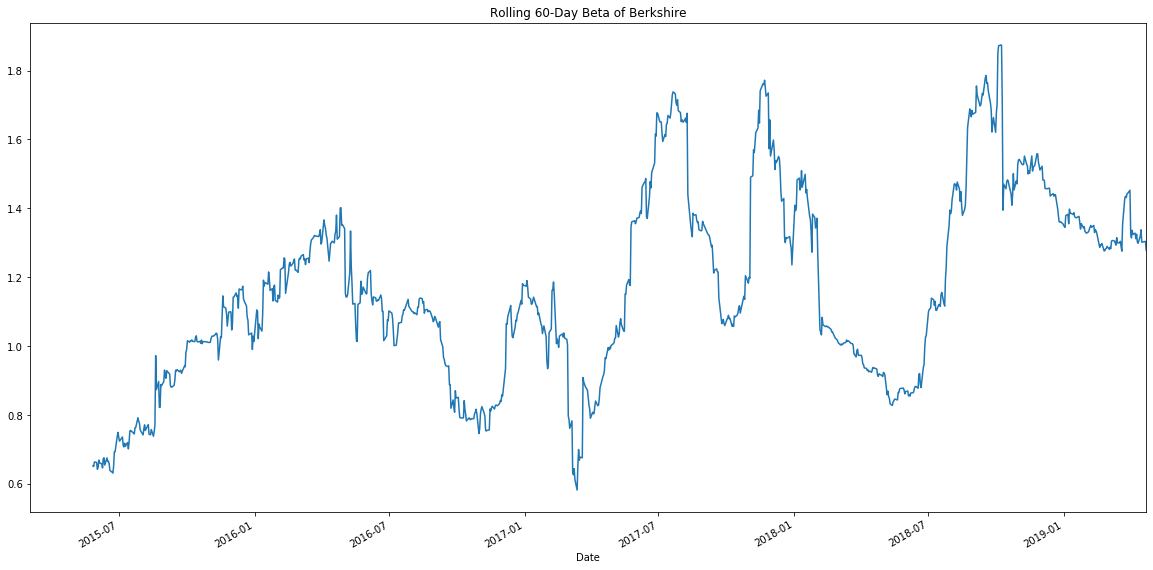

In [426]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# Calculate 21-day rolling beta of Berkshire 
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Berkshire')


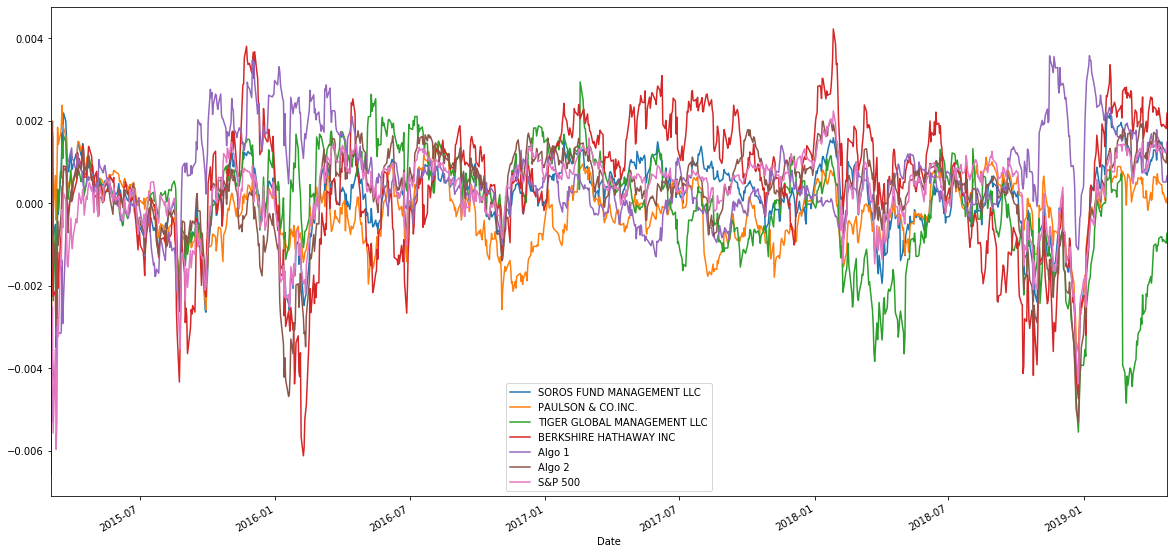

In [428]:
# Calculate a rolling window using the exponentially weighted moving average. 

exp_21 = concat_data.ewm(halflife=21).mean()
exp_21.plot(figsize=(20, 10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [429]:
# Calculate annualized Sharpe Ratios
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (concat_data.mean() * 252) / (concat_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

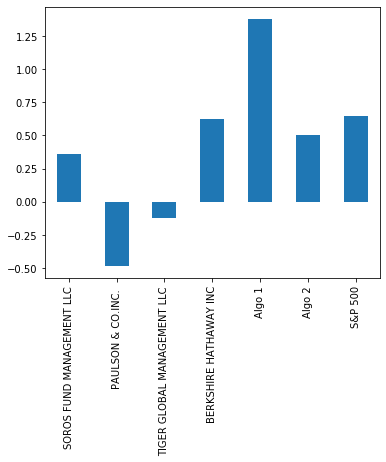

In [430]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(6, 5))


In [ ]:
On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:
- Algo-1: Sharpe ratio is 1.38 (considered acceptable to good) it outperform both the S&P500 (.65) and the whales (Bershire as the best .62)
- Algo-2: On the contrary Algo-2 ratio is .50 (considereded as sub-optimal), the S&P 500 performs better (.65) and Berkshire has a better performance (.62) as well  


---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [431]:
# Read the first stock
goog_csv_path = Path("./Resources/goog_historical.csv")
goog_csv = pd.read_csv(goog_csv_path)
#goog_csv.head()


In [432]:
goog_csv.set_index(pd.to_datetime(goog_csv['Trade DATE'], infer_datetime_format=True), inplace=True)
goog_csv.drop(columns=['Trade DATE','Symbol'], inplace=True)
#goog_csv.head()

In [433]:
goog_csv.sort_index(axis=0, ascending=True, inplace=True)
#goog_csv.head()

In [434]:
# Rename Column
goog_csv = goog_csv.rename(columns={
    "NOCP": "Google"
    })
goog_csv.head()

,Google
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [435]:
# Read the second stock
aapl_csv_path = Path("./Resources/aapl_historical.csv")
aapl_csv = pd.read_csv(aapl_csv_path)
#aapl_csv.head()

In [436]:
aapl_csv.set_index(pd.to_datetime(aapl_csv['Trade DATE'], infer_datetime_format=True), inplace=True)
aapl_csv.drop(columns=['Trade DATE', 'Symbol'], inplace=True)
#aapl_csv.head()

In [437]:
aapl_csv.sort_index(axis=0, ascending=True, inplace=True)
#aapl_csv.head()

In [438]:
aapl_csv = aapl_csv.rename(columns={
    "NOCP": "Apple"
    })
aapl_csv.head()

,Apple
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [439]:
# Read the third stock
cost_csv_path = Path("./Resources/cost_historical.csv")
cost_csv = pd.read_csv(cost_csv_path)
#cost_csv.head()

In [440]:
cost_csv.set_index(pd.to_datetime(cost_csv['Trade DATE'], infer_datetime_format=True), inplace=True)
cost_csv.drop(columns=['Trade DATE', 'Symbol'], inplace=True)
#cost_csv.head()

In [441]:
cost_csv.sort_index(axis=0, ascending=True, inplace=True)
#cost_csv.head()

In [442]:
cost_csv = cost_csv.rename(columns={
    "NOCP": "Cost"
    })
cost_csv.head()

,Cost
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [443]:
# Concatenate all DataFrames into a single DataFrame
# # Pivot so that each column of prices represents a unique symbol
concat_data_my_portf = pd.concat([goog_csv, aapl_csv, cost_csv], axis=1, join='inner')
concat_data_my_portf.head()

,Google,Apple,Cost
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [324]:

# Calculate Daily Returns + Drop Nulls
my_portf_daily_returns = concat_data_my_portf.pct_change().dropna()
my_portf_daily_returns.head()

,Google,Apple,Cost
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [327]:
# Set weights for corresponding risk profile of stocks, 
# `dot` function to sum the product each weight and the corresponding stock daily return
weights = [0.333333, 0.333333, 0.333333]
my_portf_weighted_returns = my_portf_daily_returns.dot(weights)
my_portf_weighted_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [35]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [351]:
all_assets_returns = pd.concat([concat_data, my_portf_weighted_returns], axis=1, join='inner')

In [356]:
# Rename Column
all_assets_returns = all_assets_returns.rename(columns={
    0: "Custom"
    })
#all_assets_returns.head()

In [357]:
all_assets_returns.sort_index(axis=0, ascending=False, inplace=True)
all_assets_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340


In [36]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [359]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_assets_returns.dropna(inplace=True) 
#all_assets_returns.head()

In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [360]:
# Calculate the annualized standard deviation (252 trading days)
all_assets_annual_volatility = all_assets_returns.std() * np.sqrt(252)
all_assets_annual_volatility

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211495
dtype: float64

In [38]:
# Risk
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

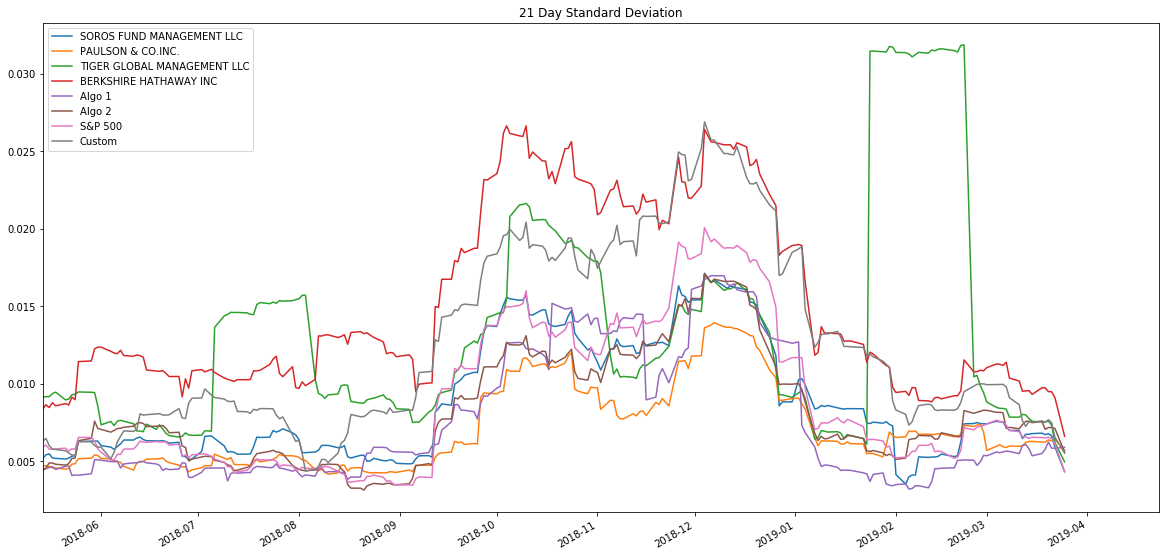

In [361]:
# Calculate and plot the rolling standard deviation for
# portfolios using a 21 trading day window

all_assets_returns.rolling(window=21).std().plot(figsize=(20,10), title='21 Day Standard Deviation')

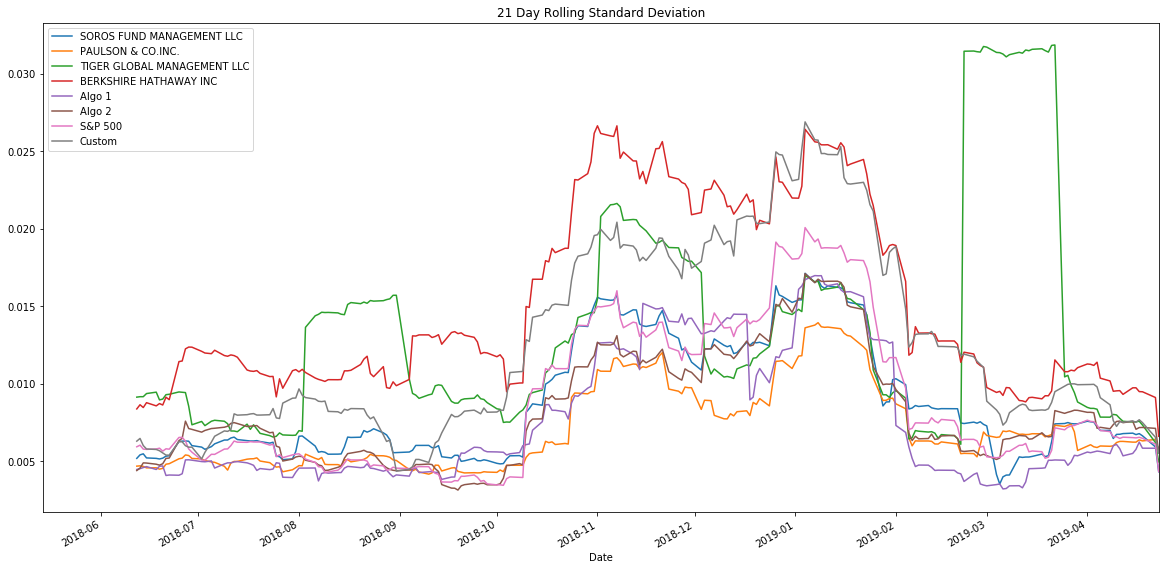

In [39]:
# Rolling
# YOUR CODE HERE

In [363]:
# Calculate annualized Sharpe Ratios
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
all_assets_sharpe_ratios = (all_assets_returns.mean() * 252) / (all_assets_returns.std() * np.sqrt(252))
all_assets_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

In [40]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

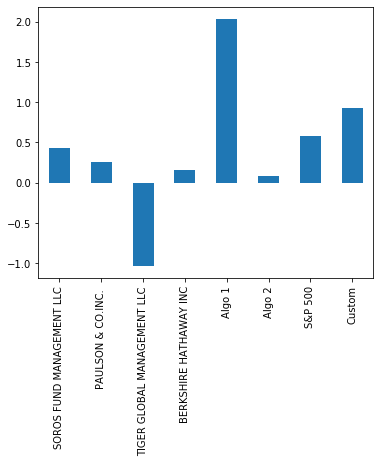

In [364]:
all_assets_sharpe_ratios.plot.bar(figsize=(6, 5))

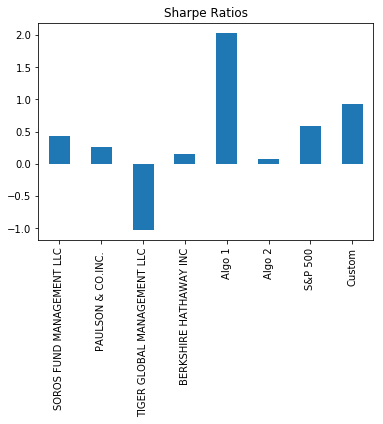

In [41]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [365]:
# Derive correlation 
all_assets_correlation = all_assets_returns.corr()
all_assets_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


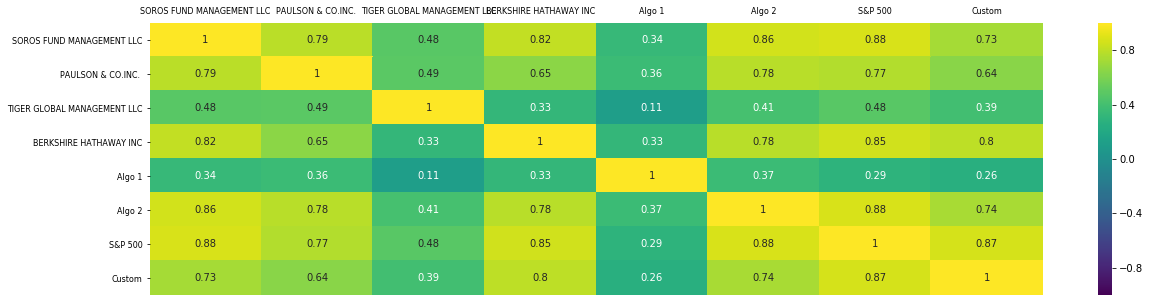

In [366]:
# `heatmap` function from the Seaborn library to visualize the correlation table
plt.subplots(figsize=(20,5))
ax = sns.heatmap(all_assets_correlation, vmin=-1, vmax=+1, cmap="viridis", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.show()

In [42]:
# Create a correlation analysis
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.73325
PAULSON & CO.INC.,0.791962,1,0.485375,0.650758,0.361301,0.783656,0.76668,0.64421
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1,0.325457,0.114554,0.409496,0.48103,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1,0.327,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327,1,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1,0.875721,0.739936
S&P 500,0.876981,0.76668,0.48103,0.852303,0.289358,0.875721,1,0.871875
Custom,0.73325,0.64421,0.391972,0.801158,0.261471,0.739936,0.871875,1


In [ ]:
# Calculate Beta for our custom portfolio compared to the total market (S&P 500)
# beta value of custom to represent the volatility of Custom returns relative to the volatility of S&P 500 returns.

# Beta = the covariance of the return of an asset (Custom) with the return of the benchmark (S&P 500)     
# divided by the variance of the return of the benchmark over a certain period.


In [379]:
# Calculate 21-day rolling covariance of Custom vs. S&P 500
custom_rolling_covariance = all_assets_returns['Custom'].rolling(window=60).cov(all_assets_returns['S&P 500'])
#custom_rolling_covariance.plot(figsize=(20, 10), title='Rolling Covariance of Custom Returns vs. S&P 500 Returns')

In [381]:
# Calculate 21-day rolling variance of S&P 500 
custom_rolling_variance = all_assets_returns['S&P 500'].rolling(window=60).var()
#custom_rolling_variance.plot(figsize=(20, 10), title='Rolling Variance of S&P 500 Returns')

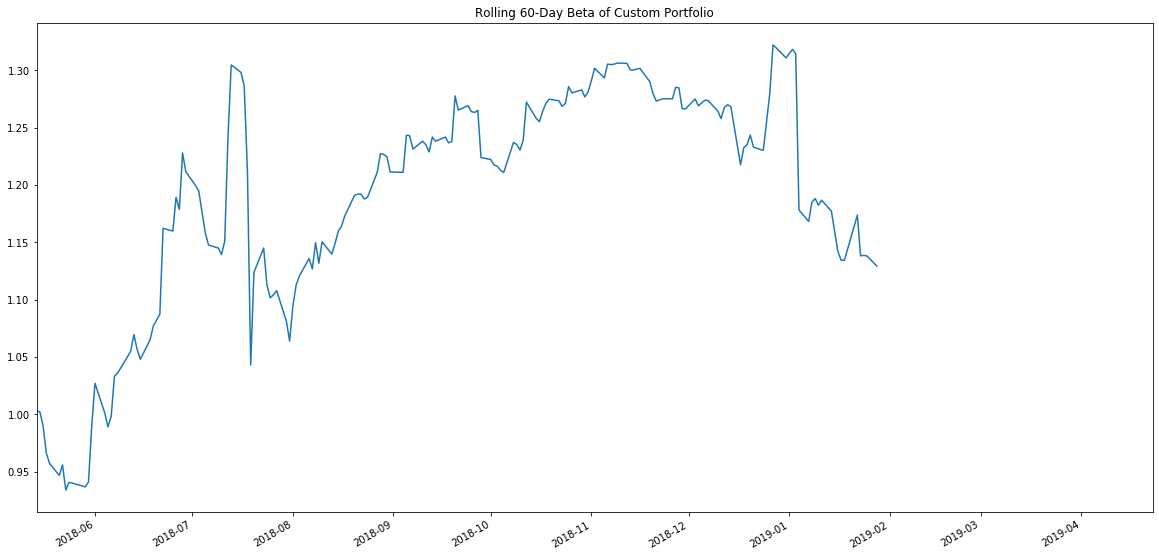

In [383]:
# Calculate 21-day rolling beta of Berkshire 
custom_rolling_beta = custom_rolling_covariance / custom_rolling_variance
custom_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Custom Portfolio')

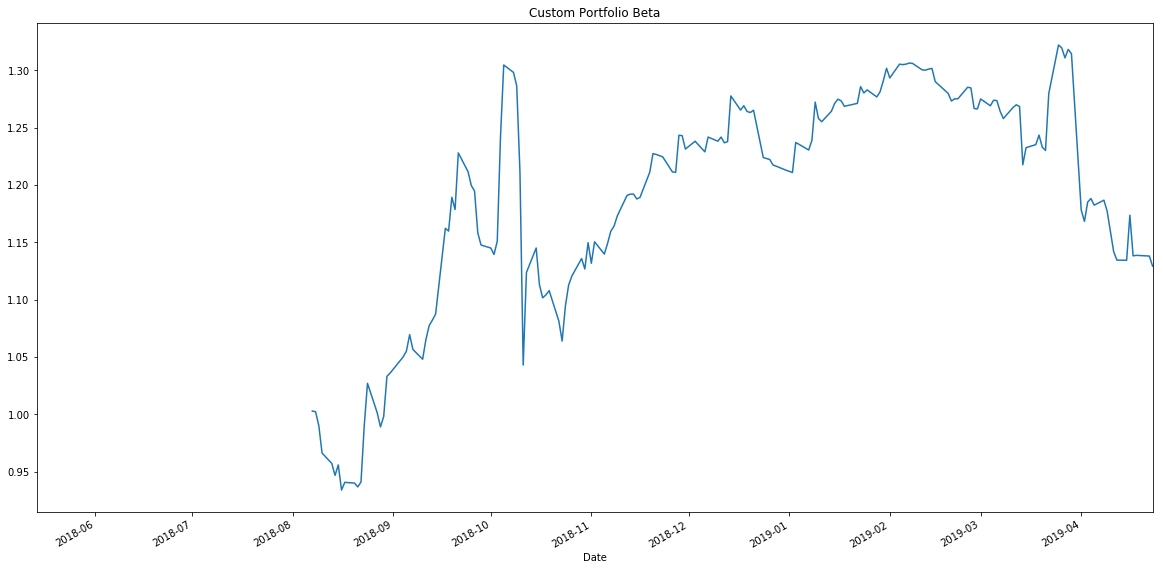

In [43]:
# Beta
# YOUR CODE HERE